In [ ]:
#importing libraries to retrieve data and read csv and to perform EDa tasks
import pandas as pd
import numpy as np
#importing for visualisation
import seaborn as sns

In [ ]:
from google.colab import files

data = files.upload()
data = pd.read_csv('/content/sample_data/Customer_Churn.csv')

Saving Customer_Churn.csv to Customer_Churn.csv


In [ ]:
#data

In [ ]:
#descriptive stats for numeric columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7037.0,64.774670,30.096416,18.25,35.5,70.35,89.85,118.75


In [ ]:
#$checking null Values in the data
#data.isnull().sum()

In [ ]:
#data.info()

In [ ]:
#changing total charges to numeric as it is continuos variable
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [ ]:
#drop nan values
data = data.dropna(how='any', axis = 0) # 0 stands for row

In [ ]:
data = data.reset_index()
#data

In [ ]:
#extratcing columns names with "object" Datatype
cols = data.select_dtypes(include=['object']).columns
cols
#copying datset
data2 = data.copy()

In [ ]:
cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
# now changing data via label encoding/....
# so thay we can apply for model
from sklearn.preprocessing import LabelEncoder

#making instance of labelnecoder
le = LabelEncoder()

#fitting and transforming
for col in cols:
    data2[col] = le.fit_transform(data2[col].astype(str))
# checking the datatypes chnges or not
print (data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7026 entries, 0 to 7025
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7026 non-null   int64  
 1   customerID        7026 non-null   int64  
 2   gender            7026 non-null   int64  
 3   SeniorCitizen     7026 non-null   int64  
 4   Partner           7026 non-null   int64  
 5   Dependents        7026 non-null   int64  
 6   tenure            7026 non-null   int64  
 7   PhoneService      7026 non-null   int64  
 8   MultipleLines     7026 non-null   int64  
 9   InternetService   7026 non-null   int64  
 10  OnlineSecurity    7026 non-null   int64  
 11  OnlineBackup      7026 non-null   int64  
 12  DeviceProtection  7026 non-null   int64  
 13  TechSupport       7026 non-null   int64  
 14  StreamingTV       7026 non-null   int64  
 15  StreamingMovies   7026 non-null   int64  
 16  Contract          7026 non-null   int64  


In [ ]:
data2.head()

In [ ]:
# dividing data for linear regression as independent and dependent

In [ ]:
X_l = data2.drop('TotalCharges', axis = 1)

In [ ]:
y_l = data2['TotalCharges']

In [ ]:
# What: improting library for splitting the data for training and testing into the proportion of 75% + 25%
# why:
#_____________________________________________________________________________________________________________
from sklearn.model_selection import train_test_split
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size = 0.25, random_state = 1111)

In [ ]:
#importing lib for data to be align in standard scaling manner
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_l = sc.fit_transform(X_train_l)
X_test_l = sc.transform(X_test_l)

# Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).

In [ ]:
#Calling the algorithm
from sklearn import linear_model #Parametric Model

In [ ]:
#instance of linear reg
regr = linear_model.LinearRegression()


In [ ]:
#Training
regr.fit(X_train_l,y_train_l)

LinearRegression()

In [ ]:
# The coefficients
print('Coefficients', regr.coef_)
print('Intercept',regr.intercept_)

Coefficients [ 2.04134039e+00 -6.26123620e-02  1.21626617e+01 -3.54735079e+00
  2.04489068e+00 -1.49787117e+01  1.48274356e+03 -1.53614661e+01
  4.14252317e+01 -1.01376489e+01  1.06157301e+02  1.10278598e+02
  9.06179048e+01  8.91321991e+01  4.05796559e+01  4.29157124e+01
 -9.71360527e+01 -3.02072378e-01  5.94043234e+01  1.05785499e+03
 -8.03886725e+01]
Intercept 2283.909166824824


In [ ]:
#Testing
y_pred = regr.predict(X_test_l)

In [ ]:
y_pred

array([2032.06978571, 1718.07624022, 2582.10763079, ...,  378.63512784,
       3052.9185907 , -957.60547374])

In [ ]:
#finding acuuracy and RMSE
from sklearn.metrics import mean_squared_error, r2_score, f1_score
print(np.sqrt(mean_squared_error(y_test_l, y_pred))) #RMSE

701.2712565849706


In [ ]:
print(r2_score(y_test_l, y_pred))

0.9055038715457693


<Axes: >

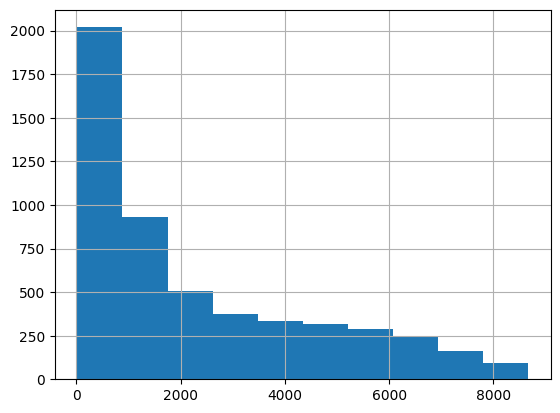

In [ ]:
#visualisation for training data
import matplotlib as plt
(y_train_l.hist())

<Axes: >

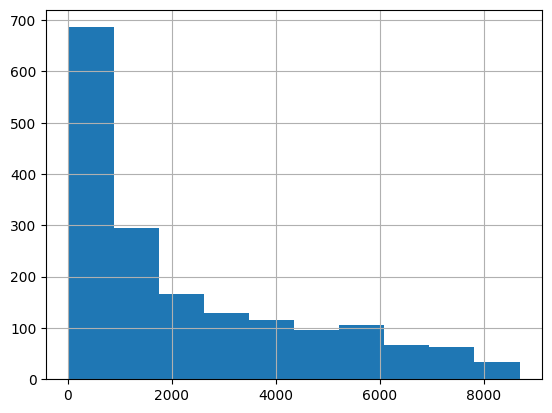

In [ ]:
#visualisation for testing data
(y_test_l.hist())

In [ ]:
#dividing independent and dependent variables
X = data2.iloc[:,:21]
y = data2.iloc[:,21:]

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# improting library for splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1111)

In [ ]:
#checking the shape of training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5269, 21)
(1757, 21)
(5269, 1)
(1757, 1)


In [ ]:
#importing lib for data to be align in standard scaling manner
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [ ]:
#importing library for logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
#Creating intsnce of logistic regression and then fitting the data
logistic_reg= LogisticRegression()
logistic_reg.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
#predicting the test data.....
y_pred=logistic_reg.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
#predcition on train data
y_pred_train = logistic_reg.predict(X_train)

In [ ]:
#importing library for confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1143,  124],
       [ 222,  268]])

In [ ]:
#finding accuracy of model
log_acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',log_acc)

Accuracy:  0.8030734206033011


<Axes: >

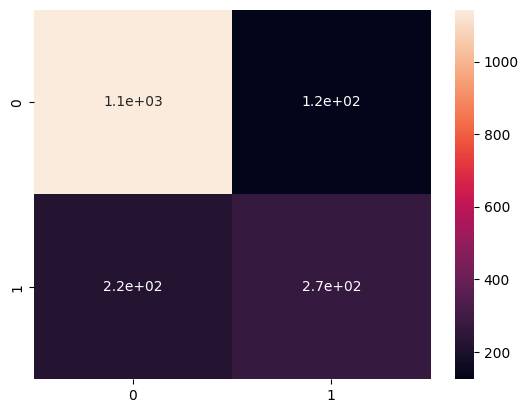

In [ ]:
sns.heatmap(cnf_matrix, annot=True)

In [ ]:
#importing library for classification_report and finding report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1267
           1       0.68      0.55      0.61       490

    accuracy                           0.80      1757
   macro avg       0.76      0.72      0.74      1757
weighted avg       0.79      0.80      0.80      1757



# Desicion Tree

A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. They are used in non-linear decision making with simple linear decision surface.

In [ ]:
#importing library for Descision Tree and we have two criterion for DT 'gini' and 'Entropy'
# you can use gini when there is binary classification otherwise use entropy
from sklearn.tree import DecisionTreeClassifier
#making instance of DT
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0,
                                    max_depth = 2, min_samples_leaf = 10, min_samples_split = 20
                                   )
#fitting the training data
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=20,
                       random_state=0)

In [ ]:
#prediction using 'testing' data
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
#checking score via importing library
from sklearn.metrics import accuracy_score
DT_acc = accuracy_score(y_pred,y_test)
DT_acc

0.7410358565737052

### **Confusion matrix**

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

In [ ]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[955, 312],
       [143, 347]])

In [ ]:
#checking Auc_Roc_Score via importing library
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test,y_pred)

np.float64(0.7309561393618222)

<h3><center>Hypertuning
    


it is used to increases the performance of a model via providing best parameters

In [ ]:
#importing library for hypertuning
from sklearn.model_selection import GridSearchCV

In [ ]:
pGrid = {'max_depth': range(2, 10), # 8
        'min_samples_leaf': range(10, 51, 10),  # 5
        'min_samples_split': range(20, 81, 20)}   # 4
#intance of GScv
gscv = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = pGrid, cv = 5,
                       scoring = 'recall', n_jobs = -1, verbose = True)

In [ ]:
#fitiing the data
gscv.fit(X,y)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(10, 51, 10),
                         'min_samples_split': range(20, 81, 20)},
             scoring='recall', verbose=True)

In [ ]:
#finding best params for model
gscv.best_params_

{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 20}

# RANDOM FOREST

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean/average prediction of the individual trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier2 = RandomForestClassifier(n_estimators = 70, criterion = 'gini', random_state = 0)
classifier2.fit(X_train, y_train)

In [ ]:
y_pred = classifier2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
RF_acc = accuracy_score(y_test,y_pred)
RF_acc

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
pargrid_rf = {'n_estimators': [70, 80, 90, 100, 120],
                  'max_features': [5,10,15,20,25]}

gscv_rf = GridSearchCV(estimator = RandomForestClassifier(),
                        param_grid = pargrid_rf,
                        cv = 5,
                        verbose = True,
                        n_jobs = -1)

gscv_rf.fit(X, y)

In [ ]:
gscv_rf.best_params_

Importing libraries to draw tree structre

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree

In [ ]:
plt.figure(figsize = (15,10))
tree.plot_tree(classifier, filled = True)

In [ ]:
text_representation = tree.export_text(classifier)
print(text_representation)

# KNN

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2,leaf_size = 10)
classifier.fit(X_train, y_train)




In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
from sklearn.metrics import accuracy_score
KNN_acc = accuracy_score(y_pred,y_test)
KNN_acc

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred,y_test)

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
pGrid = {'n_neighbors': range(10,200),
        'leaf_size': range(10, 51, 10), }
gscv = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = pGrid, cv = 5,
                       scoring = 'recall', n_jobs = -1, verbose = True)

In [ ]:
gscv.fit(X,y)

In [ ]:
gscv.best_params_

# SVM#

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0, C = 10, gamma = 0.01)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
from sklearn.metrics import accuracy_score
SVM_acc = accuracy_score(y_pred,y_test)
SVM_acc

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]# Generally we take the values in this range only
    gammas = [0.001, 0.01, 0.1, 1,10]
    param_grid = {'C': Cs, 'gamma' : gammas}# this is dictionary we are creating so as to get the best tuning
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)# coming from sklearn.modelselection
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
svc_param_selection(X_train,y_train,5)

In [ ]:
classifier = SVC(kernel = 'rbf', random_state = 0,C = 10, gamma =  0.01)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
SVM_gscv_acc = accuracy_score(y_test,y_pred)
SVM_gscv_acc

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

# NAIVEBYES


Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred_nb = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
NB_acc = accuracy_score(y_test,y_pred_nb)
NB_acc

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_nb)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)
cm

# Bagging model

Bagged Decision Trees for Classification - necessary dependencies

*Bootstrap* Aggregation is a general procedure that can be used to reduce the variance for those algorithm that have high variance. An algorithm that has high variance are decision trees, like classification and regression trees

In [ ]:
#IMPORTING AND FITTING THE MODEL
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier()
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
#PREDICTING
y_pred_bg= model.predict(X_test)

In [ ]:
#importing library to check performance
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# Accuracy on test Data
BM_model = metrics.accuracy_score(y_test, y_pred_bg)
print('Accuracy: ',BM_model)

In [ ]:
# CONFUSION MATRIX
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_bg)
confusion_matrix

In [ ]:
# CLASSIFICATION REPORT
auc_roc=metrics.classification_report(y_test,y_pred_bg)
print(auc_roc)

In [ ]:
#roc_auc score
auc_roc=metrics.roc_auc_score(y_test,y_pred_bg)
auc_roc

# Adaboost model

AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique that is used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights to incorrectly classified instances. Boosting is used to reduce bias as well as the variance for supervised learning. It works on the principle where learners are grown sequentially. Except for the first, each subsequent learner is grown from previously grown learners. In simple words, weak learners are converted into strong ones.

In [ ]:
# IMPORTING AND FITTING THE MODEL
from sklearn.ensemble import AdaBoostClassifier
model_ad = AdaBoostClassifier()
model_ad.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
#PREDICTING
y_pred_ad = model_ad.predict(X_test)

In [ ]:
# Accuracy on test Data
AB_model = metrics.accuracy_score(y_test, y_pred_ad)
print('Accuracy: ',AB_model)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_ad)
roc_auc_ad = auc(false_positive_rate, true_positive_rate)
roc_auc_ad

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.

In [ ]:

from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='yellow',label = 'AUC = %0.2f' % roc_auc_ad)

plt.legend( loc = "lower right")
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
lis=['Logistic Regression','Decision Tree','Random Forest','KNN','SVM','Naive bayes','Bagging','AdaBoost']
accuracy = log_acc, DT_acc, RF_acc, KNN_acc, SVM_acc, NB_acc , BM_model, AB_model
Scores=pd.DataFrame({'MODELS':lis,'ACCURACY':accuracy})
Scores

In [ ]:
Scores[(Scores['ACCURACY']) == max(Scores['ACCURACY'])]

SO RANDOM FOREST is best model for best classification

### 📘 Popular Boosting Algorithms in Python


## 🔸 AdaBoost (Adaptive Boosting)

A classic boosting algorithm that adaptively adjusts instance weights based on classification errors.

📦 **Library**: `scikit-learn`
📥 **Import**:

```python
from sklearn.ensemble import AdaBoostClassifier
```

🔧 **Function**:

```python
AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=None)
```

🔍 **Key Attributes**:

* `n_estimators`: The maximum number of estimators at which boosting is terminated.
* `learning_rate`: Shrinks the contribution of each classifier.
* `random_state`: Controls the randomness.

---

## 🔸 Gradient Boosting

Builds trees sequentially, minimizing a loss function (e.g., squared error for regression, logistic loss for classification) at each step.

📦 **Library**: `scikit-learn`
📥 **Import**:

```python
from sklearn.ensemble import GradientBoostingClassifier
```

🔧 **Function**:

```python
GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
```

🔍 **Key Attributes**:

* `n_estimators`: Number of boosting stages.
* `learning_rate`: Shrinks the contribution of each tree.
* `max_depth`: Limits the depth of the individual trees.

---

## 🔸 XGBoost (Extreme Gradient Boosting)

An optimized and efficient implementation of gradient boosting, known for its performance and regularization techniques.

📦 **Library**: `xgboost`
📥 **Import**:

```python
from xgboost import XGBClassifier
```

🔧 **Function**:

```python
XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
```

🔍 **Key Attributes**:

* `n_estimators`: Number of boosting rounds.
* `learning_rate`: Step size shrinkage.
* `eval_metric`: Evaluation metric for validation data.
* `use_label_encoder`: Disable label encoder for cleaner output.

---

## 🔸 LightGBM (Light Gradient Boosting Machine)

Another gradient boosting implementation, focused on speed and efficiency.

📦 **Library**: `lightgbm`
📥 **Import**:

```python
from lightgbm import LGBMClassifier
```

🔧 **Function**:

```python
LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=100)
```

🔍 **Key Attributes**:

* `num_leaves`: Number of leaves in full tree.
* `learning_rate`: Boosting learning rate.
* `n_estimators`: Number of boosting iterations.

---

## 🔸 CatBoost (Categorical Boosting)

Designed to handle categorical features effectively and often provides good performance with minimal tuning.

📦 **Library**: `catboost`
📥 **Import**:

```python
from catboost import CatBoostClassifier
```

🔧 **Function**:

```python
CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=False)
```

🔍 **Key Attributes**:

* `iterations`: Number of boosting iterations.
* `learning_rate`: Learning rate.
* `depth`: Depth of each tree.
* `verbose`: Output control.



